In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'C:\Users\Balakumaran S\Desktop\Superstore - Excel.xlsx')
df

,Sno,Order ID,Date of placing order,Order Dispatch date,Logistics Type,Name,Segment,Country,City,State,...,Discount,Profit,Unnamed: 20,log10000,Total Sales,Month,Quarter,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.2,4.2717,1,0.267823,38127.933,Jan,Q1,39360.06045,NaN,NaN
1,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.2,-64.7748,1,0.608936,21452.645,Feb,NaN,NaN,NaN,NaN
2,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.8,-5.4870,1,0.137251,97859.6638,Mar,NaN,NaN,NaN,NaN
3,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,0.2,4.8840,1,0.322709,81724.5361,Apr,Q2,55751.25475,NaN,NaN
4,593,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Melanie Seite,Consumer,United States,Laredo,Texas,...,0.2,1.1680,1,0.242633,70289.3068,May,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.2,12.1176,12,0.627346,NaN,NaN,NaN,NaN,NaN,NaN
4996,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.0,2.7279,12,0.489677,NaN,NaN,NaN,NaN,NaN,NaN
4997,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.2,19.7910,12,0.430609,NaN,NaN,NaN,NaN,NaN,NaN
4998,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,Erica Bern,Corporate,United States,Fairfield,California,...,0.2,4.5188,12,0.285785,NaN,NaN,NaN,NaN,NaN,NaN


(array([  1.,   0.,   0.,   3.,  11.,   7.,  20.,  24.,  54.,  57.,  70.,
        111., 131., 158., 188., 220., 257., 240., 237., 226., 251., 237.,
        230., 199., 213., 186., 151., 182., 164., 203., 163., 141., 136.,
        139.,  94.,  92.,  73.,  43.,  35.,  14.,  18.,   4.,   8.,   0.,
          1.,   5.,   2.,   0.,   0.,   1.]),
 array([-0.08815426, -0.06461694, -0.04107961, -0.01754229,  0.00599503,
         0.02953235,  0.05306967,  0.07660699,  0.10014431,  0.12368164,
         0.14721896,  0.17075628,  0.1942936 ,  0.21783092,  0.24136824,
         0.26490556,  0.28844289,  0.31198021,  0.33551753,  0.35905485,
         0.38259217,  0.40612949,  0.42966681,  0.45320414,  0.47674146,
         0.50027878,  0.5238161 ,  0.54735342,  0.57089074,  0.59442807,
         0.61796539,  0.64150271,  0.66504003,  0.68857735,  0.71211467,
         0.73565199,  0.75918932,  0.78272664,  0.80626396,  0.82980128,
         0.8533386 ,  0.87687592,  0.90041324,  0.92395057,  0.94748789,
 

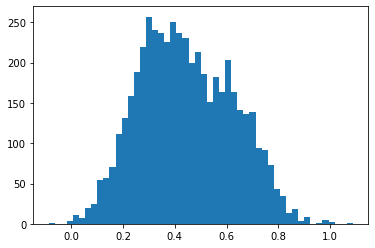

In [6]:
plt.hist(df['log10000'],bins=50)

In [26]:
x = np.array(df['log10000'])
m1 = np.average(x)
ss = np.var(x,ddof=1)
print("Average", m1)
print("Variance", ss)


Average 0.4443985447251986
Variance 0.03232000955459355


In [27]:
#From method of moments
alphaMM = m1*((m1*(1-m1)/ss)-1)
betaMM  = alphaMM*(1-m1)/m1
print("Alpha MME : ", alphaMM)
print("Beta MME : ", betaMM)

Alpha MME :  2.950580908925828
Beta MME :  3.688911825575294


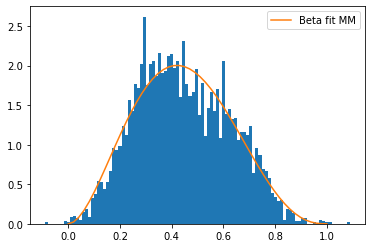

In [30]:
#Plotting fit on density histogram

fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=100)
xx = np.linspace(0,1,50)
ax.plot(xx, st.beta.pdf(xx,alphaMM,betaMM),label="Beta fit MM")
ax.legend(loc='best')
plt.show()


In [31]:
#Use bootstrap method to find alpha and beta

N= 1000 #Running the simulation 1000 times
n = 5000 #As we have 5000 samples
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
    xi = st.beta.rvs(alphaMM,betaMM,size=n)
    m1i = np.average(xi); ssi = np.var(xi)
    alpha_hat[i] = m1i*((m1i*(1-m1i)/ssi)-1)
    beta_hat[i]  = alpha_hat[i]*(1-m1i)/m1i


(array([0.10135004, 0.10135004, 0.20270007, 0.40540014, 0.30405011,
        0.50675018, 0.91215032, 0.50675018, 1.01350035, 1.62160056,
        1.01350035, 1.82430063, 2.22970077, 1.62160056, 3.95265137,
        3.54725123, 4.0540014 , 3.04050105, 5.16885179, 4.96615172,
        5.57425193, 4.86480168, 5.16885179, 6.18235214, 5.776952  ,
        5.776952  , 5.57425193, 3.54725123, 3.14185109, 2.93915102,
        2.53375088, 2.63510091, 2.0270007 , 2.33105081, 0.81080028,
        1.41890049, 1.01350035, 0.91215032, 0.50675018, 0.40540014,
        0.20270007, 0.10135004, 0.40540014, 0.10135004, 0.10135004,
        0.        , 0.10135004, 0.        , 0.        , 0.10135004]),
 array([3.46739117, 3.47725796, 3.48712476, 3.49699155, 3.50685835,
        3.51672514, 3.52659193, 3.53645873, 3.54632552, 3.55619232,
        3.56605911, 3.57592591, 3.5857927 , 3.5956595 , 3.60552629,
        3.61539309, 3.62525988, 3.63512668, 3.64499347, 3.65486027,
        3.66472706, 3.67459386, 3.68446065, 3.

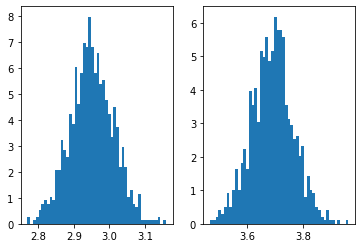

In [35]:
#Plot histogram of the estimates(alpha,beta) from bootstrap

ax1 = plt.subplot(121)
ax1.hist(alpha_hat,density=True,bins=50)
ax2 = plt.subplot(122)
ax2.hist(beta_hat,density=True,bins=50)


The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator

In [36]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.06084364592865924
0.07449059421438306


In [39]:
del1_alpha = np.percentile(alpha_hat - alphaMM, 97.5)
del2_alpha = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1_alpha,del2_alpha])
del1_beta = np.percentile(beta_hat - betaMM, 97.5)
del2_beta = np.percentile(beta_hat - betaMM, 2.5)
print([del1_beta,del2_beta])

[0.11831024834220828, -0.12187918873784653]
[0.14758773972765935, -0.15128779226763694]


In [42]:
#The 95% C.I. works out to(for alpha and beta):
print([alphaMM - del1_alpha, alphaMM - del2_alpha])
print([betaMM - del1_beta, betaMM - del2_beta])

[2.8322706605836196, 3.0724600976636744]
[3.5413240858476347, 3.8401996178429307]


Using MLE:

In [85]:
#Referred wiki for formulae for estimation of alpha and beta

p = np.sign(x) * (np.abs(x))**(1/n)
pminusx = (np.abs(1-x)**(1/n))
G_x = np.prod(p)
G_1minusx = np.prod(pminusx)

alphaML = 1/2 + G_x/(2*(1 - G_x - G_1minusx))
print(alphaML)
betaML = 1/2 + G_1minusx/(2*(1 - G_x - G_1minusx))
print(betaML)



3.0393044178574136
3.791020430224173


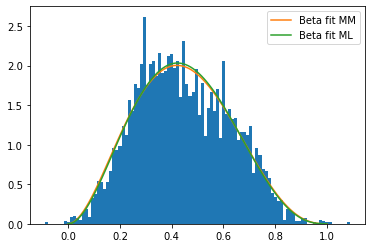

In [91]:
#Checking the fit with the histogram

fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=100)
xx = np.linspace(0,1,100)
ax.plot(xx, st.beta.pdf(xx,alphaMM,betaMM),label="Beta fit MM")
ax.plot(xx, st.beta.pdf(xx,alphaML,betaML),label="Beta fit ML")
ax.legend(loc='best')
plt.show()


,Sno,Order ID,Date of placing order,Order Dispatch date,Logistics Type,Name,Segment,Country,City,State,...,Discount,Profit,Unnamed: 20,log10000,Total Sales,Month,Quarter,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.2,4.2717,1,0.267823,38127.933,Jan,Q1,39360.06045,NaN,NaN
1,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.2,-64.7748,1,0.608936,21452.645,Feb,NaN,NaN,NaN,NaN
2,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,United States,Naperville,Illinois,...,0.8,-5.4870,1,0.137251,97859.6638,Mar,NaN,NaN,NaN,NaN
3,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,0.2,4.8840,1,0.322709,81724.5361,Apr,Q2,55751.25475,NaN,NaN
4,593,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Melanie Seite,Consumer,United States,Laredo,Texas,...,0.2,1.1680,1,0.242633,70289.3068,May,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.2,12.1176,12,0.627346,NaN,NaN,NaN,NaN,NaN,NaN
4996,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.0,2.7279,12,0.489677,NaN,NaN,NaN,NaN,NaN,NaN
4997,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,United States,New York City,New York,...,0.2,19.7910,12,0.430609,NaN,NaN,NaN,NaN,NaN,NaN
4998,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,Erica Bern,Corporate,United States,Fairfield,California,...,0.2,4.5188,12,0.285785,NaN,NaN,NaN,NaN,NaN,NaN
